# SIGNAL PROCESSING TP2 - M2 AI
## To Do: FIR Delay effect

- Benedictus Kent Rachmat
- Jacobo Ruiz Ocampo

Sources:
- https://www.youtube.com/watch?app=desktop&v=GwgAFqK0QgI

---

## IMPORT

In [29]:
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

## PLAY THE AUDIO

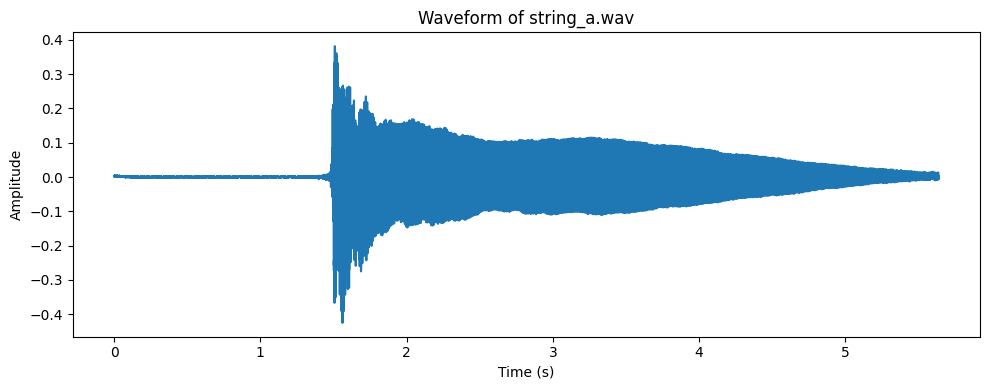

In [30]:
filename = "string_a.wav"
y, sr = librosa.load(filename)

plt.figure(figsize=(10, 4))
# librosa.display.waveshow(y, sr=sr)
plt.plot(np.linspace(0, len(y) / sr, num=len(y)), y)
plt.title(f'Waveform of {filename}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

ipd.Audio(y, rate=sr)

## Determine the impulse response of the filter

The impulse response of a system characterizes its behavior based on its response to an impulse input. An impulse in discrete-time is denoted by $\delta[t]$ and is defined as:
$$\delta[t] = 
\begin{cases} 
1 & \text{if } t = 0 \\
a & \text{if } t = D \\
0 & \text{otherwise}
\end{cases}$$

Given the system's equation:
$$
s[t] = e[t] + a \cdot e[t - D]
$$
Where $s[t]$ is the output and $e[t]$ is the input. When the input $e[t]$ is an impulse ($\delta[t]$), the system's response (impulse response) $h[t]$ is:
$$
h[t] = \delta[t] + a \cdot \delta[t - D]
$$

This results in:

$$h[t] = 
\begin{cases} 
1 & \text{if } t = 0 \\
a & \text{if } t = D \\
0 & \text{otherwise}
\end{cases}$$

This impulse response provides insight into how the system will react to any other input.

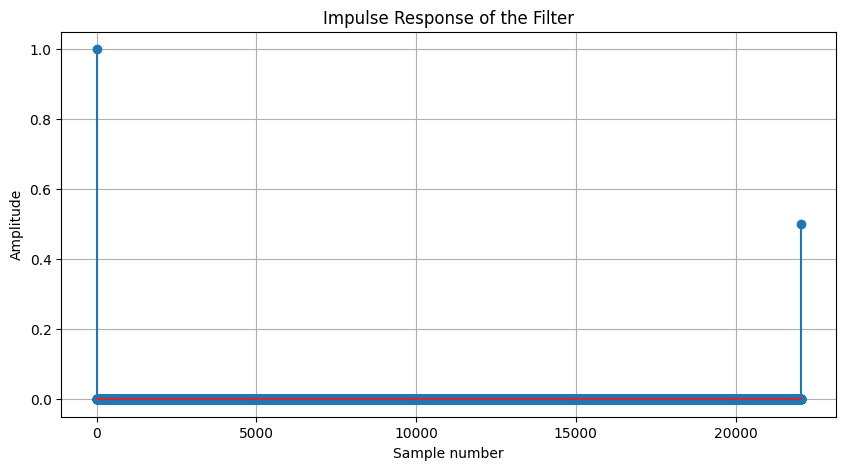

In [31]:
a = 0.5
D = sr

# Generate impulse response
h = np.zeros(D + 1)
h[0] = 1
h[D] = a

# Plotting
plt.figure(figsize=(10, 5))
plt.stem(h)
plt.title('Impulse Response of the Filter')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


## Provide the Frequency response of the filter ??

To determine the frequency response of a system, we compute the Fourier Transform of its impulse response.

Given the impulse response $h[t]$ of a system, the frequency response  $H(f)$ is derived as the Fourier Transform of $h[t]$:

$$
H(f) = \mathcal{F}\{h[t]\}
$$

For our defined system, where the impulse response is:

$$
h[t] = \delta[t] + a \cdot \delta[t - D]
$$


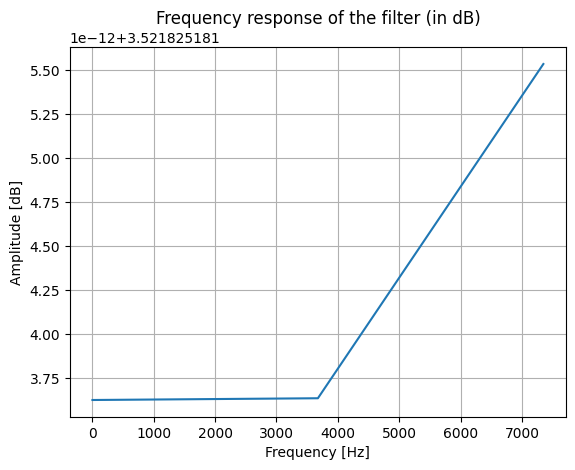

In [32]:
N = len(y)
fs = sr
T = N / fs
W, H = freqz(h, 1, round(T/2), fs=fs)

# Plot the frequency response
plt.figure(1)
plt.plot(W, 20 * np.log10(np.abs(H) + np.finfo(float).eps))
plt.title('Frequency response of the filter (in dB)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(True)
plt.show()

## Implement the delay effect in the time domain

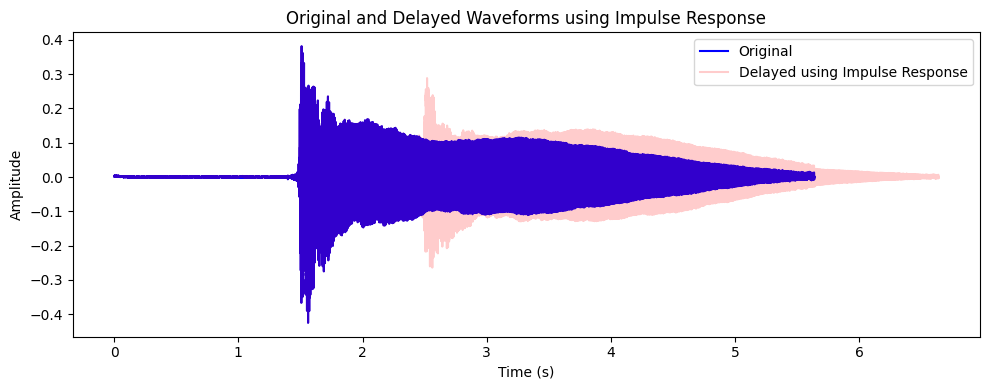

In [33]:
y_delayed = np.convolve(y, h, mode='full')

plt.figure(figsize=(10, 4))
# librosa.display.waveshow(y, sr=sr, alpha=1, label='Original')
# librosa.display.waveshow(y_delayed, sr=sr, color='r', alpha=0.2, label='Delayed using Impulse Response')
plt.plot(np.linspace(0, len(y) / sr, len(y)), y, label='Original', color='b')
plt.plot(np.linspace(0, len(y_delayed) / sr, len(y_delayed)), y_delayed, label='Delayed using Impulse Response', color='r', alpha=0.2)

plt.title('Original and Delayed Waveforms using Impulse Response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

ipd.Audio(y_delayed, rate=sr)